In [100]:
dset = 'mnist10k'

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

X = np.loadtxt('data/%s_X.txt' % dset)
labels = np.loadtxt('data/%s_labels.txt' % dset)

In [102]:
import trimap
from importlib import reload
reload(trimap)
from trimap import Wrapper as TriMap

trimap = TriMap(X)
# trimap.generate_triplets(verbose=True)
# trimap.save_triplets('models/%s.pkl' % dset)
trimap.load_triplets('models/%s.pkl' % dset)

In [143]:
normal_init = 0.0001*np.random.normal(size=[X.shape[0], 2])

# Y_default = trimap.embed(embed_init=0.0001*normal_init, verbose=True)
Y_momentum = trimap.embed(num_iters=500, embed_init=0.001*normal_init, optimizer='sgd-momentum', verbose=True)
# Y_adam = trimap.embed(num_iters=500, embed_init=normal_init, optimizer='adam', verbose=True)
# Y_normal = trimap.embed(embed_init=normal_init, verbose=True)
# Y_svd = trimap.embed(embed_init=svd_init, verbose=True)
# Y_both = trimap.embed(embed_init=svd_init+normal_init, verbose=True)

Iteration:  100, Loss: 61.748, Violated triplets: 0.0602
Iteration:  200, Loss: 47.220, Violated triplets: 0.0524
Iteration:  300, Loss: 41.386, Violated triplets: 0.0502
Iteration:  400, Loss: 38.026, Violated triplets: 0.0481
Iteration:  500, Loss: 35.663, Violated triplets: 0.0470


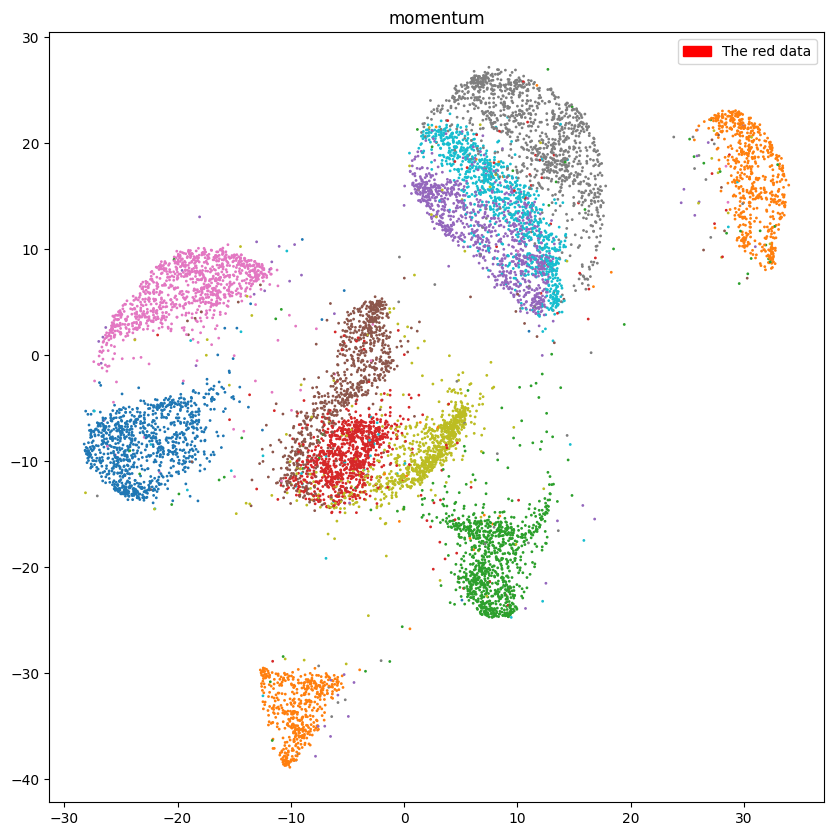

In [144]:
import matplotlib.patches as mpatches

def plot_embed(Y, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.rcParams['image.cmap'] = 'tab10'
    red_patch = mpatches.Patch(color='red', label='The red data')
    plt.legend(handles=[red_patch])
    plt.scatter(Y[:, 0], Y[:, 1], 1, labels)
    plt.show()

# plot_embed(Y_default, 'default')
# plot_embed(Y_svd, 'svd')
plot_embed(Y_momentum, 'momentum')
# plot_embed(Y_adam, 'adam')

In [110]:
Y_small_svd_momentum = trimap.embed(embed_init=0.001*svd_init, optimizer='sgd-momentum', lr=100.0,
                                    verbose=True)

Iteration:  100, Loss: 36.146, Violated triplets: 0.0425
Iteration:  200, Loss: 33.037, Violated triplets: 0.0397
Iteration:  300, Loss: 32.598, Violated triplets: 0.0397
Iteration:  400, Loss: 32.348, Violated triplets: 0.0398
Iteration:  500, Loss: 32.199, Violated triplets: 0.0398
Iteration:  600, Loss: 32.089, Violated triplets: 0.0399
Iteration:  700, Loss: 31.997, Violated triplets: 0.0399
Iteration:  800, Loss: 31.918, Violated triplets: 0.0400
Iteration:  900, Loss: 31.849, Violated triplets: 0.0400
Iteration: 1000, Loss: 31.787, Violated triplets: 0.0400
Iteration: 1100, Loss: 31.732, Violated triplets: 0.0401
Iteration: 1200, Loss: 31.682, Violated triplets: 0.0401
Iteration: 1300, Loss: 31.635, Violated triplets: 0.0401
Iteration: 1400, Loss: 31.551, Violated triplets: 0.0401
Iteration: 1500, Loss: 31.504, Violated triplets: 0.0401
Iteration: 1600, Loss: 31.466, Violated triplets: 0.0401
Iteration: 1700, Loss: 31.431, Violated triplets: 0.0401
Iteration: 1800, Loss: 31.398, 

In [111]:
Y_adam_lr = trimap.embed(embed_init=0.001*svd_init, optimizer='adam', lr=100.0, verbose=True)

Iteration:  100, Loss: 42.594, Violated triplets: 0.0580
Iteration:  200, Loss: 31.858, Violated triplets: 0.0438
Iteration:  300, Loss: 30.538, Violated triplets: 0.0441
Iteration:  400, Loss: 30.310, Violated triplets: 0.0442
Iteration:  500, Loss: 30.197, Violated triplets: 0.0440
Iteration:  600, Loss: 30.151, Violated triplets: 0.0440
Iteration:  700, Loss: 30.077, Violated triplets: 0.0439
Iteration:  800, Loss: 30.031, Violated triplets: 0.0439
Iteration:  900, Loss: 29.976, Violated triplets: 0.0438
Iteration: 1000, Loss: 29.931, Violated triplets: 0.0437
Iteration: 1100, Loss: 29.909, Violated triplets: 0.0437
Iteration: 1200, Loss: 29.875, Violated triplets: 0.0437
Iteration: 1300, Loss: 29.859, Violated triplets: 0.0437
Iteration: 1400, Loss: 29.817, Violated triplets: 0.0436
Iteration: 1500, Loss: 29.799, Violated triplets: 0.0436
Iteration: 1600, Loss: 29.774, Violated triplets: 0.0436
Iteration: 1700, Loss: 29.767, Violated triplets: 0.0437
Iteration: 1800, Loss: 29.756, 

In [105]:
Y_svd_adam = trimap.embed(embed_init=0.001*svd_init, optimizer='adam', verbose=True)

Iteration:  100, Loss: 32.415, Violated triplets: 0.0403
Iteration:  200, Loss: 31.810, Violated triplets: 0.0404
Iteration:  300, Loss: 31.476, Violated triplets: 0.0405
Iteration:  400, Loss: 31.251, Violated triplets: 0.0407
Iteration:  500, Loss: 31.088, Violated triplets: 0.0409
Iteration:  600, Loss: 30.962, Violated triplets: 0.0411
Iteration:  700, Loss: 30.862, Violated triplets: 0.0412
Iteration:  800, Loss: 30.753, Violated triplets: 0.0413
Iteration:  900, Loss: 30.682, Violated triplets: 0.0414
Iteration: 1000, Loss: 30.619, Violated triplets: 0.0415
Iteration: 1100, Loss: 30.562, Violated triplets: 0.0416
Iteration: 1200, Loss: 30.510, Violated triplets: 0.0417
Iteration: 1300, Loss: 30.463, Violated triplets: 0.0418
Iteration: 1400, Loss: 30.411, Violated triplets: 0.0418
Iteration: 1500, Loss: 30.354, Violated triplets: 0.0418
Iteration: 1600, Loss: 30.299, Violated triplets: 0.0419
Iteration: 1700, Loss: 30.244, Violated triplets: 0.0420
Iteration: 1800, Loss: 30.193, 

In [104]:
Y_svd_rmsprop = trimap.embed(embed_init=0.001*svd_init, optimizer='rmsprop', verbose=True)

Iteration:  100, Loss: 34.177, Violated triplets: 0.0434
Iteration:  200, Loss: 32.416, Violated triplets: 0.0419
Iteration:  300, Loss: 31.994, Violated triplets: 0.0418
Iteration:  400, Loss: 31.768, Violated triplets: 0.0417
Iteration:  500, Loss: 31.606, Violated triplets: 0.0417
Iteration:  600, Loss: 31.477, Violated triplets: 0.0417
Iteration:  700, Loss: 31.383, Violated triplets: 0.0417
Iteration:  800, Loss: 31.278, Violated triplets: 0.0418
Iteration:  900, Loss: 31.195, Violated triplets: 0.0418
Iteration: 1000, Loss: 31.131, Violated triplets: 0.0418
Iteration: 1100, Loss: 31.071, Violated triplets: 0.0419
Iteration: 1200, Loss: 31.014, Violated triplets: 0.0420
Iteration: 1300, Loss: 30.966, Violated triplets: 0.0420
Iteration: 1400, Loss: 30.917, Violated triplets: 0.0420
Iteration: 1500, Loss: 30.880, Violated triplets: 0.0420
Iteration: 1600, Loss: 30.837, Violated triplets: 0.0421
Iteration: 1700, Loss: 30.798, Violated triplets: 0.0421
Iteration: 1800, Loss: 30.775, 

In [122]:
def plot_embed(Y, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.scatter(Y[:, 0], Y[:, 1], 10, labels)
    plt.show()

# plot_embed(Y_svd_rmsprop, 'rmsprop')
# plot_embed(Y_small_svd_momentum, 'high lr momentum')
# plot_embed(Y_adam_lr, 'high lr adam')
# plot_embed(Y_adam_lr2, 'higher lr adam')
# plot_embed(Y_svd_adam, 'adam')
# plot_embed(Y_small_svd_adadelta, 'adadelta')
# plot_embed(Y_tiny_svd, 'tiny svd')
# plot_embed(Y_small_svd, 'small svd')
# plot_embed(Y_medium_svd, 'medium svd')
# plot_embed(Y_svd, 'svd')
# plot_embed(Y_tiny, 'tiny')
# plot_embed(Y_normal, 'normal')

ValueError: c of shape (60000,) not acceptable as a color sequence for x with size 10000, y with size 10000